In [1]:
pip install -q transformers datasets evaluate accelerate "gluonts[torch]" ujson tqdm


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q transformers datasets evaluate accelerate "gluonts[torch]" ujson tqdm


Note: you may need to restart the kernel to use updated packages.


The traffic dataset, used by Lai et al. (2017), contains the San Francisco Traffic. It contains 862 hourly time series showing the road occupancy rates in the range 
[0,1] on the San Francisco Bay Area freeways from 2015 to 2016.

In [1]:
from gluonts.dataset.repository.datasets import get_dataset

dataset = get_dataset("traffic")
freq = dataset.metadata.freq
prediction_length = dataset.metadata.prediction_length


Head of the dataset:
            timestamp   value
0 2015-01-01 00:00:00  0.0048
1 2015-01-01 01:00:00  0.0072
2 2015-01-01 02:00:00  0.0040
3 2015-01-01 03:00:00  0.0039
4 2015-01-01 04:00:00  0.0042

Tail of the dataset:
                timestamp   value
14031 2016-08-07 15:00:00  0.0575
14032 2016-08-07 16:00:00  0.0604
14033 2016-08-07 17:00:00  0.0530
14034 2016-08-07 18:00:00  0.0533
14035 2016-08-07 19:00:00  0.0500

 shape of the dataset
(14036, 2)
                 timestamp         value
count                14036  14036.000000
mean   2015-10-20 09:30:00      0.047779
min    2015-01-01 00:00:00      0.000000
25%    2015-05-27 04:45:00      0.007800
50%    2015-10-20 09:30:00      0.046200
75%    2016-03-14 14:15:00      0.059600
max    2016-08-07 19:00:00      0.449700
std                    NaN      0.058943

 info of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   

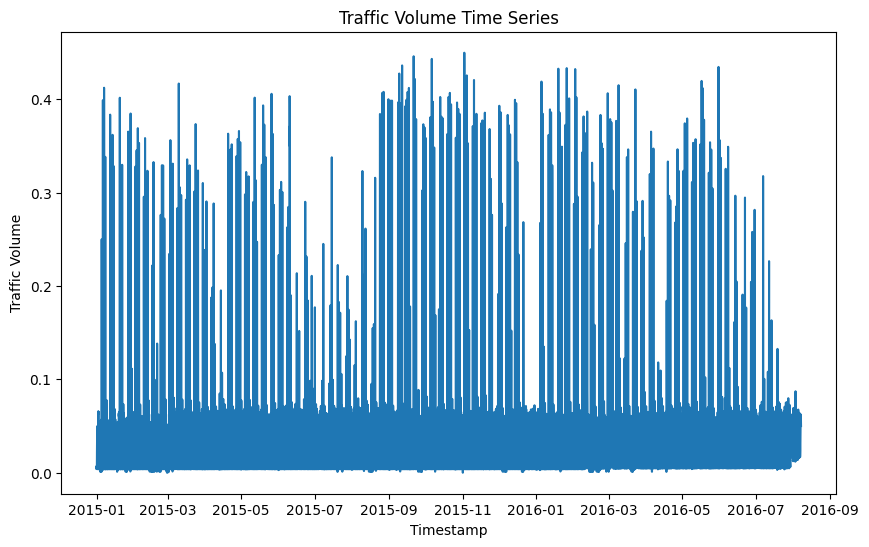

Descriptive Statistics:
Mean Traffic Volume: 0.047778655
Median Traffic Volume: 0.0462
Standard Deviation of Traffic Volume: 0.058943078


In [17]:
# View the first few rows (head) of the dataset
print("Head of the dataset:")
print(df.head())

# View the last few rows (tail) of the dataset
print("\nTail of the dataset:")
print(df.tail())

print('\n shape of the dataset')
print(df.shape)

print(df.describe())
print('\n info of the dataset')
print(df.info())
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.repository.datasets import get_dataset

# Load the traffic dataset
dataset = get_dataset("traffic")

# Extract the first time series from the dataset
traffic_data = next(iter(dataset.train)).copy()

# Convert the start timestamp to a Timestamp object
start_timestamp = pd.Timestamp(str(traffic_data['start']))

# Convert the time series to a pandas DataFrame
df = pd.DataFrame({
    'timestamp': pd.date_range(start=start_timestamp, periods=len(traffic_data['target']), freq=dataset.metadata.freq),
    'value': traffic_data['target']
})

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'])
plt.xlabel('Timestamp')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Time Series')
plt.show()

# Compute descriptive statistics
mean_traffic = df['value'].mean()
median_traffic = df['value'].median()
std_traffic = df['value'].std()

print("Descriptive Statistics:")
print("Mean Traffic Volume:", mean_traffic)
print("Median Traffic Volume:", median_traffic)
print("Standard Deviation of Traffic Volume:", std_traffic)


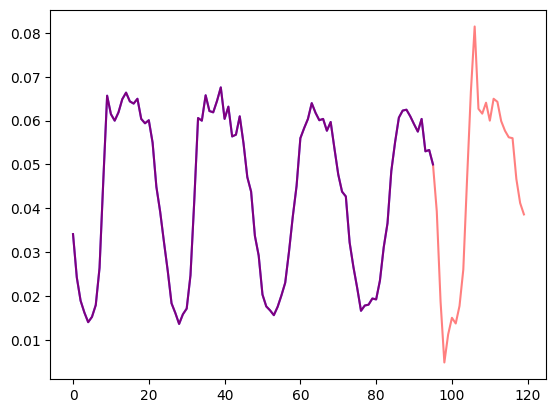

In [8]:
#Let's visualize a time series in the dataset and plot the train/test split:
import matplotlib.pyplot as plt

train_example = next(iter(dataset.train))
test_example = next(iter(dataset.test))

num_of_samples = 4*prediction_length

figure, axes = plt.subplots()
axes.plot(train_example["target"][-num_of_samples:], color="blue")
axes.plot(
    test_example["target"][-num_of_samples - prediction_length :],
    color="red",
    alpha=0.5,
)

plt.show()


In [18]:
#Let's define the train/test splits:
train_dataset = dataset.train
test_dataset = dataset.test
